## Analysis of a WhatsApp chat

### Run the analysis script

In [1]:
import whatsappAnalyse as wa
import importlib

# analyses an export of a WhatsApp Chat
origFilePath = "example.txt"
preprocessedFilePath = "Chats/Preprocessed" + origFilePath
origFilePath = "Chats/" + origFilePath

# processing data
wa.preprocessFile(origFilePath, preprocessedFilePath)
df = wa.convertFileToDataframe(preprocessedFilePath)
df = wa.postprocessData(df)

In [2]:
# show a part of the dataframe
df.head(10)

,Timestamp,Name,Message,Message length,Message word count
0,2024-04-23 15:56:00,WhatsApp,"Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.",139.0,25
1,2024-04-23 15:56:00,WhatsApp,"B created group ""GroupName""",27.0,4
2,2024-04-23 15:56:00,WhatsApp,B added you,11.0,3
3,2024-04-23 15:57:00,B,do you want to meet on the weekend or is weekday okay?😃,55.0,12
4,2024-04-23 16:00:00,A,Both is fine,12.0,3
5,2024-04-23 16:01:00,C,Weekdays works too,18.0,3
6,2024-04-23 16:01:00,B,i’m fine with weekdays too,26.0,5
7,2024-04-23 16:03:00,B,is this saturday too soon?,26.0,5
8,2024-04-23 16:03:00,C,No,2.0,1
9,2024-04-23 16:03:00,C,At least not for me,19.0,5


### Run the different statistics

In [3]:
display(wa.countMessagesByName(df))

Name
C           5059
B           4807
A           3395
D            873
WhatsApp      10
Name: Message, dtype: int64

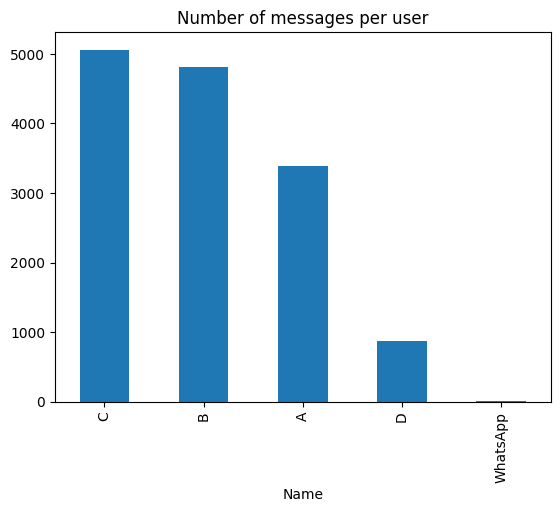

In [4]:
wa.countMessagesByName(df).plot(kind="bar", title="Number of messages per user");

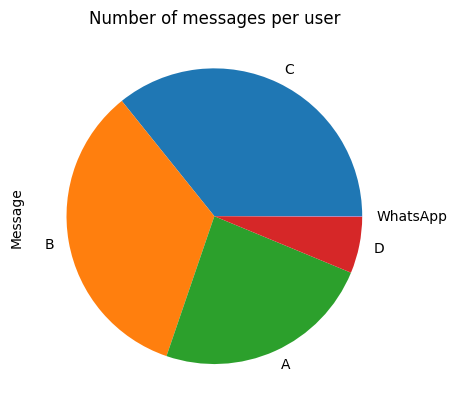

In [5]:
wa.countMessagesByName(df).plot(kind="pie", title="Number of messages per user");

In [6]:
wa.countWordsByName(df)

Name
C           20870
B           20035
A           18010
D            3720
WhatsApp       64
Name: Message word count, dtype: int64

<Axes: title={'center': 'Number of words per user'}, xlabel='Name'>

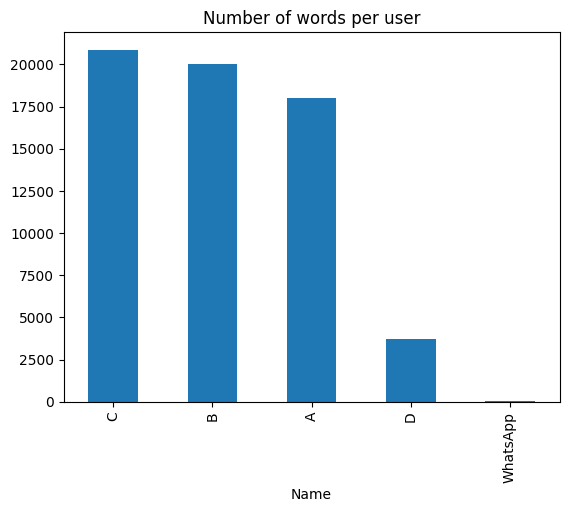

In [7]:
wa.countWordsByName(df).plot(kind="bar", title="Number of words per user")

<Axes: title={'center': 'Number of words per user'}, ylabel='Message word count'>

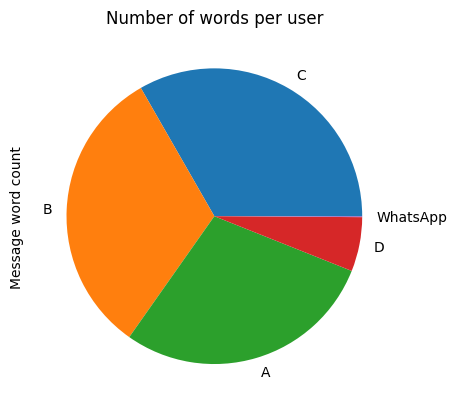

In [8]:
wa.countWordsByName(df).plot(kind="pie", title="Number of words per user")

In [9]:
wa.calcAvrgWordsPerMessage(df)

,Message,Message length,Message word count,length/message,words/message
Name,,,,,
C,5059,113093.0,20870,22.354813,4.125321
B,4807,105107.0,20035,21.865405,4.167880
A,3395,101704.0,18010,29.956996,5.304860
D,873,19788.0,3720,22.666667,4.261168
WhatsApp,10,350.0,64,35.000000,6.400000


In [10]:
import pandas as pd

# show the whole output
with pd.option_context('display.max_rows', None):
    display(wa.getUserWordFrequency(df))

,word,Message word count
0,ich,2316
1,ist,1075
2,das,1060
3,nicht,1032
4,und,921
5,du,847
6,die,717
7,so,677
8,aber,607
9,was,515


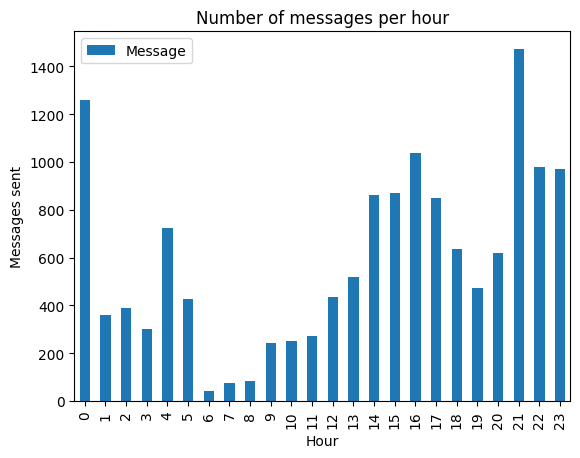

In [11]:
wa.getMessageFrequencyPerHour(df, plot=True);

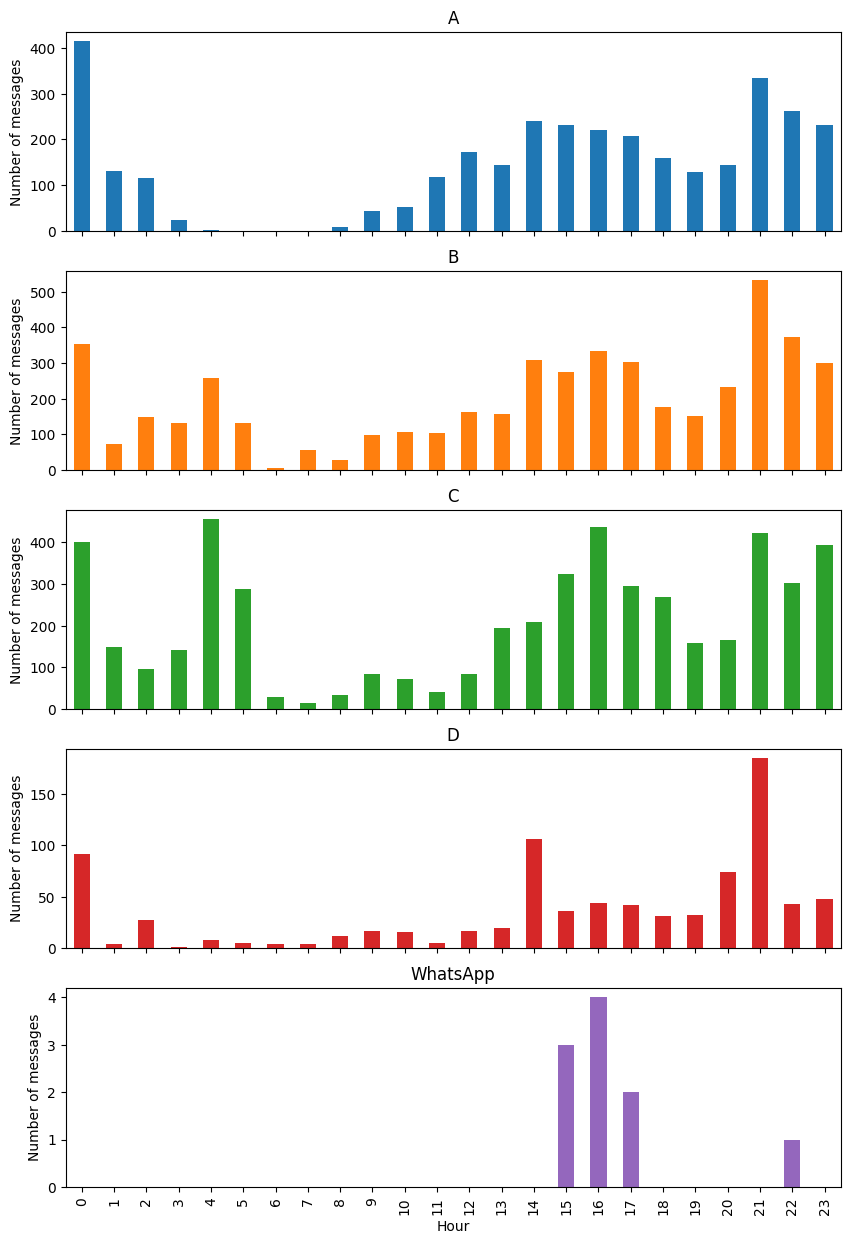

In [12]:
wa.getMessageFrequencyPerMemberPerHour(df, plot=True);

<Axes: title={'center': 'Average number of messages per day of the week'}, xlabel='Weekday', ylabel='Number of messages sent'>

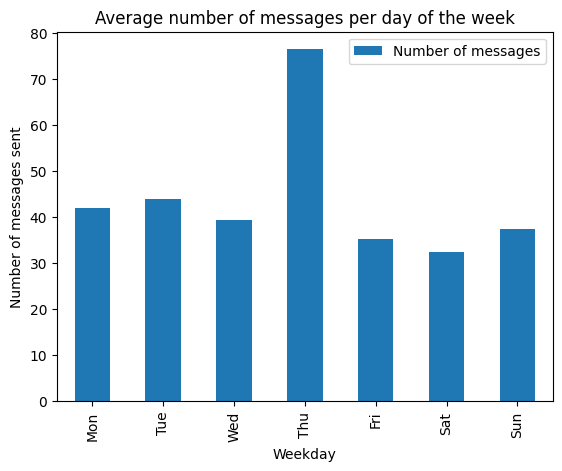

In [13]:
wa.plotAvrgNumberOfMessagesInTimeFrame(df, "Day")

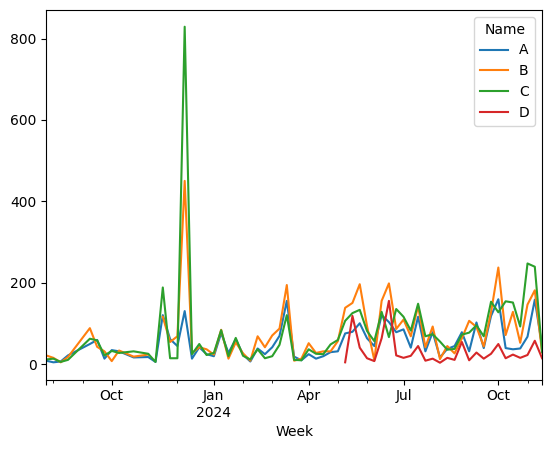

In [14]:
pd.options.mode.chained_assignment = None
wa.showMessageCountOverTime(df, names=["A", "B", "C", "D"]);